In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

### **Function to create an ANN model**

In [26]:
def ann_model(x, y):
  ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )

  # learning rate
  learningRate = .05

  # loss function
  lossfun = nn.MSELoss()

  # optimizer (the flavor of gradient descent to implement)
  optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

  # train the model
  numepochs = 500
  losses = torch.zeros(numepochs)


  ## Train the model!
  for epochi in range(numepochs):

    # forward pass
    yHat = ANNreg(x)

    # compute loss
    loss = lossfun(yHat,y)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # show the losses

  # final forward pass and final predictions
  predictions = ANNreg(x)

  return predictions,losses

## **Function to create data and outputs**

In [15]:
  def create_data(slope):

    # create data
    N=50
    x = torch.randn(N,1)
    y = slope*x + torch.randn(N,1)/2

    return x,y

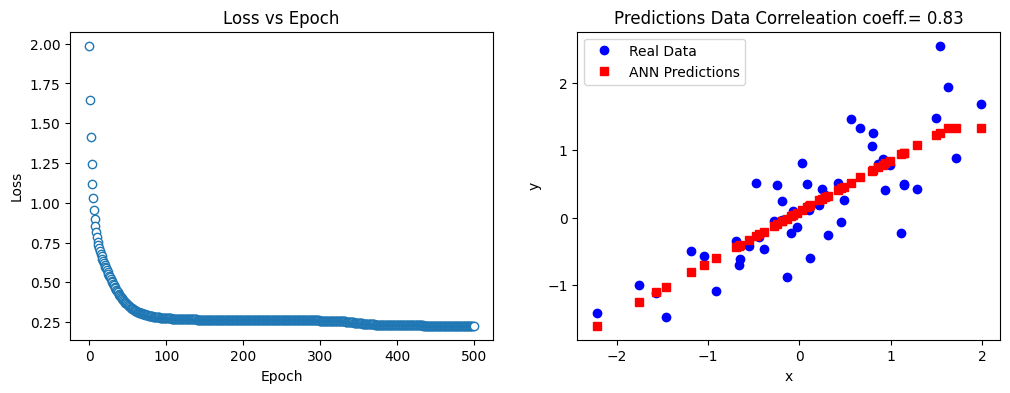

In [46]:
## Run the model once
x, y = create_data(0.8)
yHat, losses = ann_model(x,y)

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=0.1)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss vs Epoch')

ax[1].plot(x,y,'bo',label='Real Data')
ax[1].plot(x,yHat.detach(),'rs',label='ANN Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'Predictions Data Correleation coeff.= {np.corrcoef(y.T,yHat.T.detach())[0,1]:0.2f}')
ax[1].legend()

plt.show();

In [47]:
# (takes 3 mins with 21 slopes and 50 exps)

# the slopes to simulate
slopes = np.linspace(-2,2,21)

numExps = 50

# initialize output matrix
results = np.zeros((len(slopes),numExps,2))

for slopei in range(len(slopes)):

  for N in range(numExps):

    # create a dataset and run the model
    x,y = create_data(slopes[slopei])
    yHat,losses = ann_model(x,y)
    yHat = yHat.detach()

    # store the final loss and performance
    results[slopei,N,0] = losses[-1]
    results[slopei,N,1] = np.corrcoef(y.T,yHat.T)[0,1]


# correlation can be 0 if the model didn't do well. Set nan's->0
results[np.isnan(results)] = 0

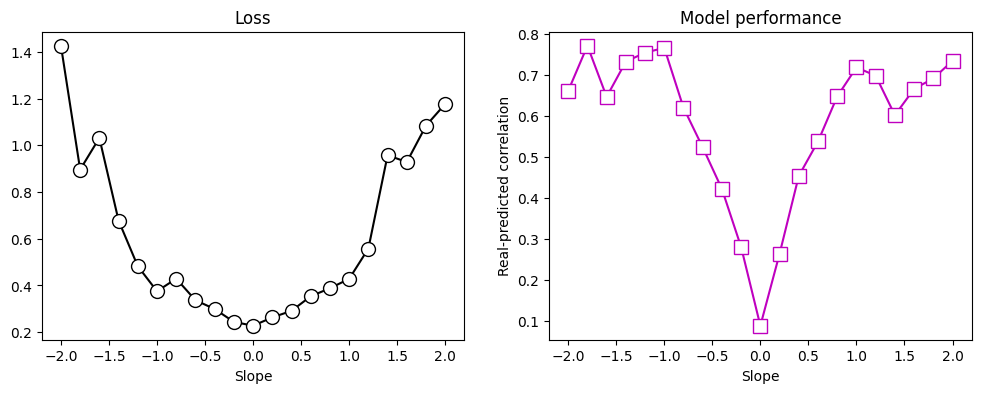

In [48]:
# plot the results!

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()